# Máquina de Turing Probabilistica

Una máquina de Turing probabilística 


## Implementación de una máquina de Turing en Python

En la siguiente sección desarrollamos la implementación de una máquina de Turing convencional y al mismo tiempo una máquina de Turing probabilistica, queremos explorar además el comportamiento en complejidad temporal de estas máquinas y la posibilidad de visualizar dichos elementos haciendo uso de herramientas de análisis de datos. Pero inicialmente, nos vamos a centrar en la simulación de una máquina de Turing en lenguaje Python para cualquier conjunto de funciones de transición, usando el alfabeto $\Sigma =\{0,1\}$ para un número $N$ de cintas.


### Paquetes a utilizar
Para esta implementación de las simulaciones, serán necesarios los siguientes paquetes en sus últmas versiones
- Numpy
- Pandas

Para la parte de visualización, se va a hacer uso de los siguientes paquetes en sus últimas versiones
- Scipy
- Sys
- Matplotlib
- Seaborn
- networkx (V 2.4)



In [1]:
#Empezamos con la importación


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Antes de construir la máquina, es necesario definir una clase para la cinta

class Tape(object):
    
    # A pesar de que la cinta viene delimitada por una lista de tamaño variable, el intérprete entiende
    # cualquier valor no definido como un símbolo en blanco, es decir, se puede entender la cinta como
    # infinita en ambas direcciones o solo en una, por convención, asumamos que es infinita únicamente
    # hacia la izquierda.
    
    blank_symbol = "_"
    
    
    def __init__(self,tape_string = ""):
        
        # La cinta viene dada por un valor de entrada, por ejemplo, el input de la máquina, escrito sobre
        # un dataframe
        
        self.__tape = (pd.DataFrame(dict(enumerate(tape_string)),index=["string"])).transpose()

        
    def __str__(self):
        
        # Esta función devuelve como una cadena el contenido de la cinta
        
        string=""
        for index,row in self.__tape.iterrows():
            string+=row["string"]
        return string
   
    def __getitem__(self,k):
        
        # Esta función retorna el valor de la cinta en una casilla k

        if k in self.__tape.index:
            return self.__tape["string"][k]
        else:
            return Tape.blank_symbol

    def __setitem__(self, pos, char):
        
        # Esta función modifica el valor de la cinta en una casilla k con un cáracter de entrada char
        
        self.__tape["string"][pos] = char 

        


# Clase TuringMachine

Para simular la máquina de Turing, procedemos a crear la clase correspondiente, donde una máquina de Turing $M$ viene construída por



$$
M=(N,\{\Gamma^*\},w_o,q_o,\{ q_f \},\delta)
$$




Donde $N$ es el número de cintas, $\{\Gamma^*\}$ son las cintas de entrada (Claramente $N$ se puede deducir, pero esto se especifíca por simplicidad del código) y $w_o$ es el cáracter nulo o vacío. No incluímos el alfabeto $\Sigma$ ya que por default $\Sigma=\{ 0, 1\}$ 

In [2]:
        # Definimos la clase

class TuringMachine(object):
    
    def __init__(self, 
                 nb_of_tapes=1, 
                 tapes = "", 
                 blank_symbol = "_",
                 initial_state = "",
                 final_states = None,
                 transition_function = None):
        
        # Este array contiene las posiciones iniciales
        
        initpos=[]
        
        self.__nb_of_tapes=nb_of_tapes
        self.__tape=[Tape(tapes[i]) for i in range(nb_of_tapes)]
        self.__head_positions = [0 for i in range(nb_of_tapes)]
        self.__blank_symbol = blank_symbol
        self.__current_state = initial_state
        
        # Si no se introduce una función de transición, se asume como vacío
        
        if transition_function == None:
            self.__transition_function = {}
            
        else:
            self.__transition_function = transition_function
            
        # Si no se introduce un conjunto de estados finales, se asume como vacío
        
        if final_states == None:
            self.__final_states = set()
        else:
            self.__final_states = set(final_states)
        
        #Se especifica sobre cuál cinta se quiere trabajar y se escribe como una cadena de caracteres
        
    def get_tape(self,which=0): 
        return str(self.__tape[which])
    
    def step(self):
        
        # Syntax de las reglas: READ: tape, state, char WRITE: tape, state, char, move direction
        tapes=self.__tape
        #print(tapes[0].__str__())
        char_under_heads = [tapes[i][0] for i in range(self.__nb_of_tapes)]
        #print(self.__tape)
        print(char_under_heads)
        #print(self.__head_positions[0])
        for j in range(len(char_under_heads)):
            tag=j
            x = (str(tag), self.__current_state, char_under_heads[tag])
            print(x)
            save = None
            if x in self.__transition_function:
                y = self.__transition_function[x]
                self.__tape[tag][self.__head_positions[tag]] = y[2]
                if y[3] == "R":
                    self.__head_positions[tag] += 1
                    save=y[1]
                elif y[3] == "L":
                    self.__head_positions[tag] -= 1
                    save=y[1]
            if save is not None:
                self.__current_state = save
                print("CONFIRM")
            #print(j,self.__current_state)

    def final(self):
        if self.__current_state in self.__final_states:
            print("HALT")
            return True
        else:
            return False

initial_state = "init",
accepting_states = ["final"],
transition_function = {("0","init","0"):("0","init", "1", "R"),
                       ("0","init","1"):("0","final", "_", "R"),
                       ("1","init","0"):("1","init", "0", "R"),
                       ("1","init","1"):("1","final", "_", "R"),
                       ("2","init","0"):("2","final","_", "R"),
                       ("2","init","1"):("2","final","_", "R"),
                       }
final_states = {"final"}

t = TuringMachine(3,["0100 ","1111","1010"], 
                  initial_state = "init",
                  final_states = final_states,
                  transition_function=transition_function)

print("Input on Tape:\n" + t.get_tape(0) + ", " + t.get_tape(1) + ", " + t.get_tape(2) )

while not t.final():
    t.step()
    #print(t.get_tape(0),t.get_tape(1),t.get_tape(2))

print("Result of the Turing machine calculation:")    
print(t.get_tape(0) + ", " + t.get_tape(1) + ", " + t.get_tape(2) )


Input on Tape:
0100 , 1111, 1010
['0', '1', '1']
('0', 'init', '0')
CONFIRM
('1', 'init', '1')
CONFIRM
('2', 'final', '1')
HALT
Result of the Turing machine calculation:
1100 , _111, 1010


In [3]:
def parser():
    executing=True
    listing=[]
    while executing:
        newrule=input("Please enter a new rule in the format READ: state, char TO WRITE: state, char, move direction, probability \t")
        if newrule != "0":
            if " TO " in newrule:
                listing.append(newrule)
            else:
                print("Bad format, try again :)")
        else:
            executing=False
    dictionary={"rawinputs":listing}
    rules=pd.DataFrame(dictionary)
    rules[["inputs","outputs"]]=rules["rawinputs"].str.split(" TO ", expand=True)
    rules.drop(columns=["rawinputs"],inplace=True)
    return rules

In [55]:
def parserWithList(rules):
    executing=True
    dictionary={"rawinputs":rules}
    rules=pd.DataFrame(dictionary)
    rules[["inputs","outputs"]]=rules["rawinputs"].str.split(" TO ", expand=True)
    rules.drop(columns=["rawinputs"],inplace=True)
    rules[["input state","char read"]]=rules["inputs"].str.split(",", expand=True)
    rules[["output state","char write","direction","probability"]]=rules["outputs"].str.split(",", expand=True)
    rules.drop(columns=["inputs","outputs"],inplace=True)
    rules
    return rules

In [56]:
raw=["init,0 TO init,  1, R,0.4","init,1 TO final, _, R,0.6" ,
                       "init,0 TO init,  0, R,0.51",
                       "init,1 TO final, _, R,0.4" ,                       
                       "init,0 TO final, _, R,0.14",
                       "init,1 TO final, _, R,0.54",
    ]
reglas=parserWithList(raw)
reglas

,input state,char read,output state,char write,direction,probability
0,init,0,init,1,R,0.4
1,init,1,final,_,R,0.6
2,init,0,init,0,R,0.51
3,init,1,final,_,R,0.4
4,init,0,final,_,R,0.14
5,init,1,final,_,R,0.54


In [6]:
import networkx as nx
from networkx.algorithms import community

In [7]:
raw=["init,0 TO init,  1, R,0.4","init,1 TO final, _, R,0.6" ,
                       "q0,0 TO init,  0, R,0.51",
                       "q1,1 TO final, _, R,0.4" ,                       
                       "q0,0 TO final, _, R,0.14",
                       "final,1 TO final, _, R,0.54",
    ]
reglas=parserWithList(raw)
reglas



,input state,char read,output state,char write,direction,probability
0,init,0,init,1,R,0.4
1,init,1,final,_,R,0.6
2,q0,0,init,0,R,0.51
3,q1,1,final,_,R,0.4
4,q0,0,final,_,R,0.14
5,final,1,final,_,R,0.54


In [8]:
def DrawGraph(rules):
    nodes = [rules["input state"][i] for i in range(len(rules.index))]
    edges = [(rules["input state"][i],rules["output state"][i]) for i in range(len(rules.index))]
    edgenames=[rules["char write"][i]+","+rules["direction"][i]+","+rules["probability"][i] for i in range(len(rules.index))]
    G= nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    print(nx.info(G))
    positions=nx.spring_layout(G)
    edgesn=dict(zip(edges,zip(edgenames)))
    nx.draw_networkx_edges(G,positions)
    nx.draw_networkx_nodes(G, positions, node_size=1000, node_color="#210070", alpha=0.5)
    nx.drawing.nx_pylab.draw_networkx_labels(G,positions)
    #nx.drawing.nx_pylab.draw_networkx_edge_labels(G,positions,edge_labels=edgesn)

Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 6
Average in degree:   1.5000
Average out degree:   1.5000


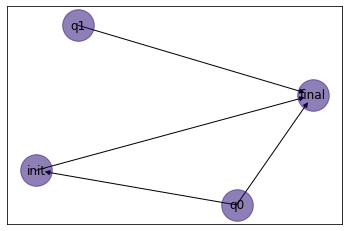

In [9]:
DrawGraph(reglas)

In [10]:
raw=["init,0 TO init,  1, R,0.4","init,1 TO final, _, R,0.6" ,
                       "q0,0 TO init,  0, R,0.51",
                       "q1,1 TO final, _, R,0.4" ,                       
                       "q0,0 TO final, _, R,0.14",
                       "final,1 TO final, _, R,0.54",
    ]

def GenerateSetOfRules(n,nbOfStates):
    x=[]
    createStates=["q"+str(i) for i in range(nbOfStates)]
    for i in range(n):
        
        string   =    (np.random.choice(createStates)
                       + ","
                       + np.random.choice(["0","1","_"])
                       + " TO " 
                       + np.random.choice(createStates)
                       + ","
                       + np.random.choice(["0","1","_"])
                       + ","
                       + np.random.choice(["L","R"],p=[0.3,0.7]) 
                       + ","
                       + str(np.around(np.random.random(),1)))
        x.append(string)
    return(x)
        

In [11]:
randomRules=GenerateSetOfRules(10,6)

In [12]:
randomRules

['q4,1 TO q3,1,R,0.1',
 'q2,1 TO q3,0,R,0.1',
 'q2,0 TO q0,1,L,0.9',
 'q4,_ TO q0,_,L,0.4',
 'q4,0 TO q3,1,R,0.2',
 'q4,_ TO q4,1,R,0.9',
 'q1,1 TO q5,_,R,0.1',
 'q1,_ TO q2,0,R,0.9',
 'q3,_ TO q3,0,R,0.9',
 'q2,0 TO q3,_,R,0.9']

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 8
Average in degree:   1.3333
Average out degree:   1.3333


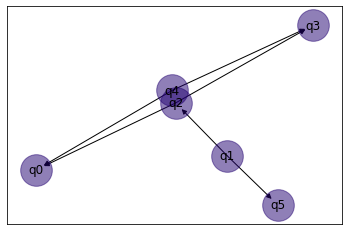

In [13]:
DrawGraph(parserWithList(randomRules))

In [62]:
class RandomTuringMachine(object):
    
    def __init__(self, 
                 tape = "", 
                 blank_symbol = "_",
                 initial_state = "",
                 final_states = None,
                 probabilistic_transition_function = None,):
        self.__tape=Tape(tape)
        self.__head_position = 0
        self.__blank_symbol = blank_symbol
        #self.__current_state = [initial_state for i in range(nb_of_tapes)]
        self.__current_state = initial_state
        if probabilistic_transition_function == None:
            self.__probabilistic_transition_function = []
        else:
            self.__probabilistic_transition_function = probabilistic_transition_function
        if final_states == None:
            self.__final_states = []
        else:
            self.__final_states = final_states
            
    def get_tape(self): 
        return str(self.__tape)
    
    def step(self):
        # Syntax of rules: READ: state, char WRITE: state, char, move direction, probability
        char_under_head = self.__tape[self.__head_position]
        print(char_under_head)
        dataframe=parserWithList(self.__probabilistic_transition_function)
        dataframe
        x=[self.__current_state,char_under_head]
        print(x)
        modified=dataframe[(dataframe["input state"]==x[0]) & (dataframe["char read"]==x[1])]
        print(modified)
        if modified.empty== False:
            tot=modified["probability"].apply(lambda x : float(x)).sum()
            newprobs=[]
            for i,row in modified.iterrows():
                newprobs.append(float(row["probability"])/tot)
            choice=np.random.choice(modified.index,p=newprobs)
            y=[modified["output state"][choice],modified["char write"][choice],modified["direction"][choice]]
            self.__tape[self.__head_position] = y[1]
            if y[2] == "R":
                self.__head_position += 1
            elif y[2] == "L":
                self.__head_position -= 1
            self.__current_state = y[0]
            print(self.__current_state)
            
        else:
            self.__current_state =self.__current_state

        

    def final(self):
        if self.__current_state in self.__final_states:
            print("HALT")
            return True
        else:
            return False


        
        
initial_state = "init",
accepting_states = ["final"],

raw=["init,0 TO init,  1, R,0.4","init,1 TO final, _, R,0.6" ,
                       "q0,0 TO init,  0, R,0.51",
                       "q1,1 TO final, _, R,0.4" ,                       
                       "q0,0 TO final, _, R,0.14",
                       "final,1 TO final, _, R,0.54",
    ]


def Execute(tape,initial_state,final_states,threshold):
    counter=0
    t=RandomTuringMachine(tape,"_", initial_state,final_states,raw)
    while (t.final()==False) and counter<=threshold:
        t.step()
        print("Input on Tape:\n" + t.get_tape())
    print("Result of the Turing machine calculation:")    
    print(t.get_tape())
    if counter==threshold:
        print("REJECT OR UNDECIDABLE")


In [63]:
Execute("10001110","init",["final"],20)
        

1
['init', '1']
  input state char read output state char write direction probability
1        init         1        final          _         R         0.6
final
Input on Tape:
 _0001110
HALT
Result of the Turing machine calculation:
 _0001110


In [31]:
raw=["init,0 TO init,  1, R,0.4","init,1 TO final, _, R,0.6" ,
                       "q0,0 TO init,  0, R,0.51",
                       "q1,1 TO final, _, R,0.4" ,                       
                       "init,0 TO final, _, R,0.14",
                       "final,1 TO final, _, R,0.54",
    ]

reglas=parserWithList(raw)
reglas
x=["init","0"]
print(x)
modified=reglas[(reglas["input state"]==x[0]) & (reglas["char read"]==x[1])]


['init', '0']
